# A simple, flexible 2D raytracer in Python

In [1]:
import raytracer as rt
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
%matplotlib notebook

The environment is a set of obstacles, each one defined by a series of vertices (in clockwise order) and two refractive indices: one for outside the obstacle and one for inside.

In [3]:
env = [rt.Obstacle([(0.4, 0), (0.4, 1), (0.6, 1), (0.6, 0)], 1.0, 2.7),
       rt.Obstacle([(2.4, -1), (2.4, 2), (2.6, 2), (2.6, -1)], 1.0, 2.7),
       rt.Obstacle([(0, 1.25), (0, 1.5), (2, 1.5), (2, 1.25)], 1.0, 2.7)]

A ray has an origin point and a direction.

In [4]:
ray = rt.Ray((1.5, 0.5), (-1, 1))

<IPython.core.display.Javascript object>


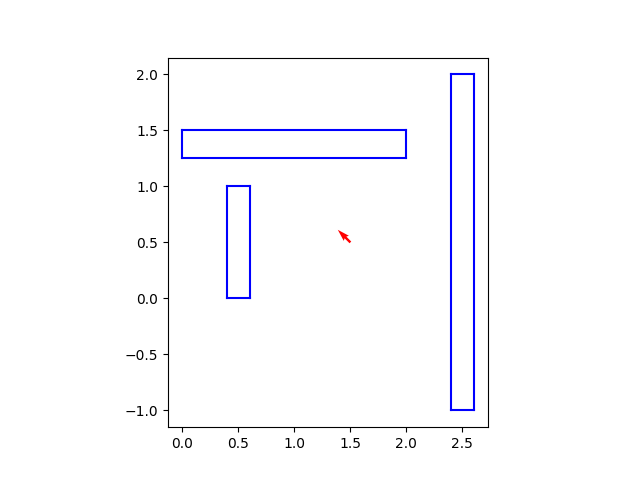

In [5]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

for obstacle in env:
    for boundary in obstacle.boundaries:
        ax.plot([boundary.p0[0], boundary.p1[0]], [boundary.p0[1], boundary.p1[1]], c='b')

ax.quiver([ray.p0[0]], [ray.p0[1]], [ray.d[0]], [ray.d[1]], color='r')

`closest_hit` determines the first intersection of the ray with the environment. It returns the distance to the intersection, the point of intersection, and the boundary that the ray intersects with. If there is no intersection it returns `None`.

`Ray.prop` propagates the ray a distance `d`. `Ray.p0` is updated. `Ray.tof` is updated depending on `Ray.speed`.

`Boundary.reflect` returns a copy of the ray after being reflected by tje boundary. `Boundary.refract` returns a copy of the array after it has been refracted. The ray's speed is also updated in this case.

## Example 1
This example calculates the points where a purely reflected ray intersects with the environment:

In [6]:
ray = rt.Ray((1.5, 0.5), (-1, 1))

points = [tuple(ray.p0)] # add the origin

hit = rt.closest_hit(ray, env)
while hit is not None:
    dist, point, boundary = hit
    points.append(tuple(point))
    ray.prop(dist)
    ray = boundary.reflect(ray)
    hit = rt.closest_hit(ray, env)

<IPython.core.display.Javascript object>


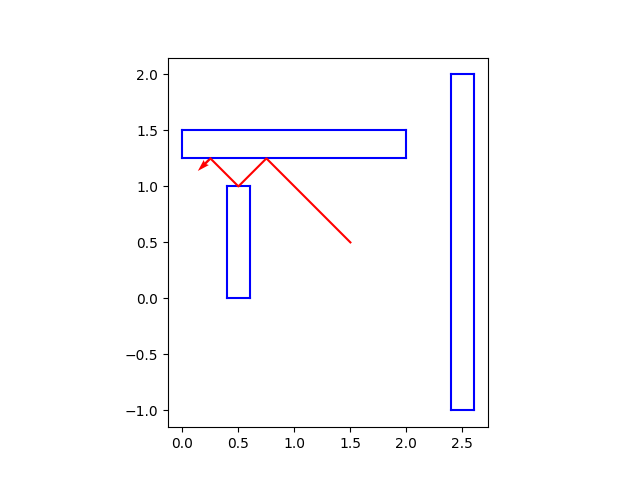

In [7]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

for obstacle in env:
    for boundary in obstacle.boundaries:
        ax.plot([boundary.p0[0], boundary.p1[0]], [boundary.p0[1], boundary.p1[1]], c='b')

x, y = zip(*points)
ax.plot(x, y, c='r')
ax.quiver([ray.p0[0]], [ray.p0[1]], [ray.d[0]], [ray.d[1]], color='r')

## Example 2

This example creates 10 rays at (1.5, 0.5) pointing in random directions. For a set number of iterations it selects the shortest ray and propagates it. Both reflections and refractions are simulated - additional child rays are appended to the list of rays at runtime.

In [8]:
rays = [rt.Ray((1.5, 0.5), (np.cos(a), np.sin(a))) for a in 2*np.pi*np.random.rand(10)]
points = [[tuple(ray.p0)] for ray in rays]

i = 0
while i < 100:
    ray_i, ray = min(enumerate(rays), key=lambda x: x[1].tof)
    hit = rt.closest_hit(ray, env)
    if hit:
        d, p, b = hit
        points[ray_i].append(tuple(p))
        ray.prop(d)
        refl = b.reflect(ray)
        refr = b.refract(ray)
        rays[ray_i] = refl
        if refr:
            rays.append(refr)
            points.append(copy.deepcopy(points[ray_i]))
        else:
            pass # total internal reflection
    else: # no intersections, propagate to max distance
        ray.prop(5)
        points[ray_i].append(tuple(ray.p0))

    i += 1

<IPython.core.display.Javascript object>


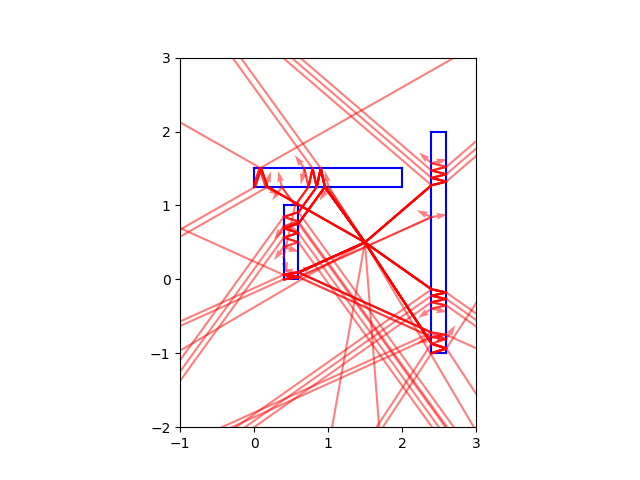

(-2, 3)

In [9]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

for obstacle in env:
    for boundary in obstacle.boundaries:
        ax.plot([boundary.p0[0], boundary.p1[0]], [boundary.p0[1], boundary.p1[1]], c='b')

for points_i in points:
    x, y = zip(*points_i)
    ax.plot(x, y, c='r', alpha=0.5)
    
for ray in rays:
    ax.quiver([ray.p0[0]], [ray.p0[1]], [ray.d[0]], [ray.d[1]], color='r', alpha=0.5)
    
ax.set_xlim([-1, 3])
ax.set_ylim([-2, 3])

In [10]:
len(rays)

66